# Explore Riga Real Estate Dataset Using `pandas` & `jupyter`

![858104829_929f35b7bd_c.jpg](img/858104829_929f35b7bd_c.jpg)
Elizabetes iela, 33, Rīga, Latvija, Art Nouveau Building, balcony with caryatids. Taken on August 18, 2006. Source: https://www.flickr.com/photos/40351463@N00/858104829 by paula soler-moya, license: Attribution-NonCommercial-NoDerivs 2.0 Generic (CC BY-NC-ND 2.0)
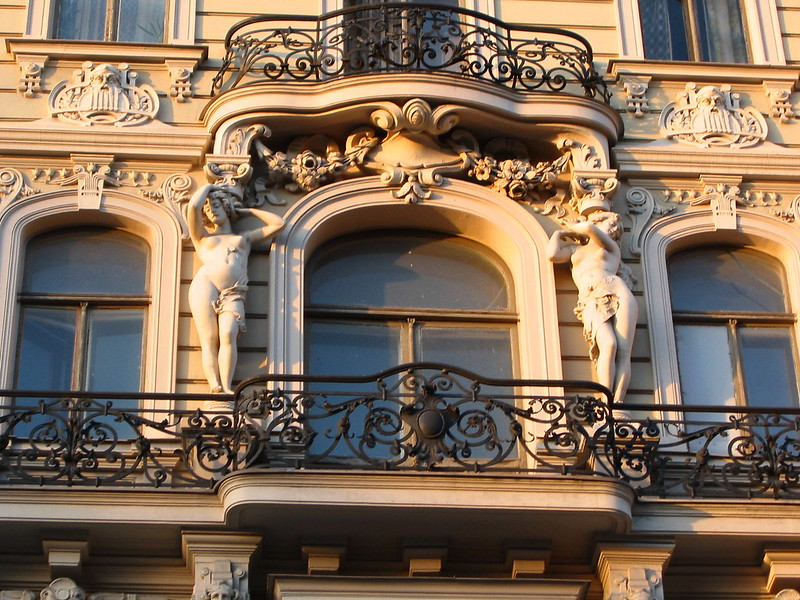

## Goal
This notebook was prepared as part of a training exercise. The task was to analyze an open-sourced dataset using pandas and demonstrate its capabilities in data manipulation and analysis. I have chosen the following dataset:

## The Dataset
Source: https://www.kaggle.com/datasets/trolukovich/riga-real-estate-dataset, by Alexandr Antonov, license: CC0: Public Domain.

The dataset contains 4689 real estate object advertisings (appartments) in Riga in 2019.

## Imports & Read

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
plt.style.use('classic')
%matplotlib inline

In [191]:
df = pd.read_csv('data/riga_re.csv')
df.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [192]:
print(f'Dataset size: {df.shape}')
print(f'Columns: {df.columns}')
print(f'Column types: \n{df.dtypes}')

Dataset size: (4689, 13)
Columns: Index(['op_type', 'district', 'street', 'rooms', 'area', 'floor',
       'total_floors', 'house_seria', 'house_type', 'condition', 'price',
       'lat', 'lon'],
      dtype='object')
Column types: 
op_type          object
district         object
street           object
rooms            object
area            float64
floor           float64
total_floors    float64
house_seria      object
house_type       object
condition        object
price           float64
lat             float64
lon             float64
dtype: object


In the `op_type` variable, we have different types of deals in advertising. Our primary interest lies in rents and sales. Therefore, I have preselected a couple of colors to visually distinguish the rent and sale visualizations.

In [193]:
r = '#535f6e'
s = '#bc5922'

## Getting to know the data
To gain an understanding of the data stored in each of the columns, we can generate quick summaries. We will create separate tables for string (object) columns and float-type columns since the .describe() function produces different statistics for them.

In [194]:
columns_object = df.select_dtypes(include='object').columns.tolist()
columns_float = df.select_dtypes(include='float64').columns.tolist()

In [195]:
df[columns_object].describe()

,op_type,district,street,rooms,house_seria,house_type,condition
count,4689,4674,4237,4500,4247,4239,4283
unique,6,51,2543,7,15,6,3
top,For sale,centrs,Kungu 25,2,P. kara,Masonry,All amenities
freq,2680,1435,25,1548,877,1322,4094


In [196]:
df[columns_float].describe()

,area,floor,total_floors,price,lat,lon
count,4325.000000,4356.000000,4345.000000,4219.000000,4482.000000,4482.000000
mean,61.204557,4.552342,6.160184,58728.706803,55.831982,22.303814
std,36.089986,8.565853,4.326098,76252.501519,3.255038,8.571356
min,1.000000,1.000000,1.000000,5.000000,46.314475,-100.708194
25%,39.000000,2.000000,5.000000,450.000000,56.936154,24.065920
50%,53.000000,3.000000,5.000000,40000.000000,56.952443,24.122890
75%,75.000000,5.000000,7.000000,82000.000000,56.963540,24.168477
max,427.000000,99.000000,99.000000,830000.000000,59.347471,24.340866


We might expect the number of rooms to be of integer type, but it is not.

In [197]:
df.rooms.value_counts()

2       1548
3       1209
1       1126
4        360
Citi     126
5         96
6         35
Name: rooms, dtype: int64

This is due to the presence of the "Citi" value, which is a Latvian term for "others." Let's take a closer look at the objects in this category.

In [198]:
df.loc[df.rooms == 'Citi'].head(10)

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
42,Buying,Pļavnieki,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
51,Buying,Pļavnieki,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
79,For rent,Sarkandaugava,Tilta 5,Citi,76.0,2.0,4.0,P. kara,Masonry,All amenities,295.0,56.995073,24.127396
148,Buying,Ziepniekkalns,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
315,For rent,centrs,Brīvības 103,Citi,300.0,4.0,5.0,Specpr.,Masonry,All amenities,350.0,56.961433,24.133111
317,Buying,Zolitūde,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
384,For sale,centrs,Blaumaņa 9,Citi,287.0,5.0,6.0,Renov.,Brick,All amenities,298544.0,56.953926,24.123761
512,Buying,Pļavnieki,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
535,For sale,Vecrīga,Kungu 25,Citi,330.0,5.0,6.0,Specpr.,Panel,All amenities,474990.0,56.945338,24.109464
580,Buying,Purvciems,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029


In [199]:
df.loc[df.rooms == 'Citi', ['op_type']].value_counts()

op_type 
Buying      104
For sale     11
Renting       8
For rent      3
dtype: int64

These mainly represent buying deals where the customer is not referencing a particular object.

## Outliers
In domains like advertising, it is highly likely to encounter a significant number of extreme values, which could be erroneously entered or exceptionally unusual. I would exclude such outliers from this analysis to prevent them from distorting the observed trends in the majority of observations.

For instance, let's create a boxplot for the price variable to identify potential outliers. However, it is worth noting that the default visualization of price may not be very effective in detecting extreme values on the lower end of the distribution.

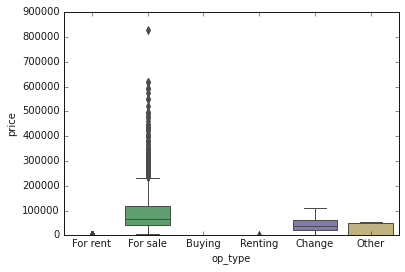

In [200]:
sns.boxplot(data=df, y='price', x='op_type');

We can customize the visualization by orienting the boxplots horizontally, superimposing individual observations. Additionally, we can use a log-scale axis to stretch the low-end area. To determine the cut-off point for outliers, we can apply annotations to highlight the n-smallest or n-largest observations. This will provide us with a better understanding of the extreme values and help us make decisions regarding their exclusion.

In [201]:
def boxplots_lin_log(df, col, nsm=5, nlar=5, color='gray'):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(2, 1, figsize=(16, 6), gridspec_kw=dict(height_ratios=[4, 4]))
    nsmallest = df[col].nsmallest(nsm).max()
    nlargest = df[col].nlargest(nlar).min()
    
    ax[0].set_xscale("linear")
    ax[0].annotate(str(nsmallest), xy=(nsmallest, 0), xytext=(-70, 40), textcoords='offset points',
             arrowprops=dict(color='black', arrowstyle='->'))
    ax[0].annotate(str(nlargest), xy=(nlargest, 0), xytext=(70, 40), textcoords='offset points',
             arrowprops=dict(color='black', arrowstyle='->'))
    sns.boxplot(x=col, data=df, whis=1.5,width=.6, color=color, ax=ax[0])
    sns.stripplot(x=col, data=df, size=4, color=".3", linewidth=0, ax=ax[0])

    ax[1].set_xscale("log")
    ax[1].annotate(str(nsmallest), xy=(nsmallest, 0), xytext=(-70, 40), textcoords='offset points',
             arrowprops=dict(color='black', arrowstyle='->'))
    ax[1].annotate(str(nlargest), xy=(nlargest, 0), xytext=(70, 40), textcoords='offset points',
             arrowprops=dict(color='black', arrowstyle='->'))
    sns.boxplot(x=col, data=df, whis=1.5,width=.6, color=color, ax=ax[1])
    sns.stripplot(x=col, data=df, size=4, color=".3", linewidth=0, ax=ax[1])
    
    ax[0].xaxis.grid(True)
    ax[1].xaxis.grid(True)
    ax[0].set(ylabel="linear")
    ax[1].set(ylabel="log")
    sns.despine(trim=True, left=True)
# todo: consider to add the selected quantiles to annotations as well
#     low_q = df[col].quantile([0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2])
#     high_q = df[col].quantile([0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

With rent prices, it is quite interesting to observe a cluster with price ranges less than 85 EUR. Further investigation is required to understand this pattern. It is possible that these prices represent prices per room in the apartment or prices for a shorter duration such as daily or weekly rates, rather than the full monthly rate.

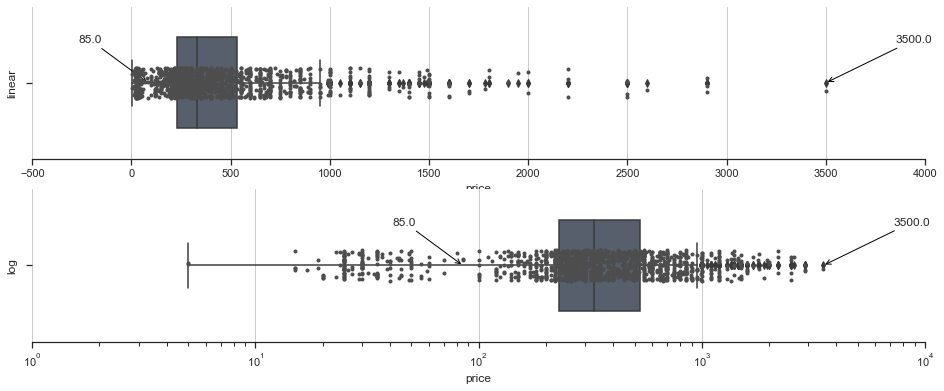

In [202]:

df_rent = df.query("op_type == 'For rent'")
boxplots_lin_log(df_rent, 'price', nsm=157, nlar=1, color=r)

When analyzing sale prices, we will focus on prices starting from 6,000 EUR and limit the upper range to 700,000 EUR. This is because an apartment priced at 830,000 EUR is quite exceptional and does not provide sufficient statistical data in this price range. By setting these limits, we can concentrate on a more representative range of sale prices for our analysis.

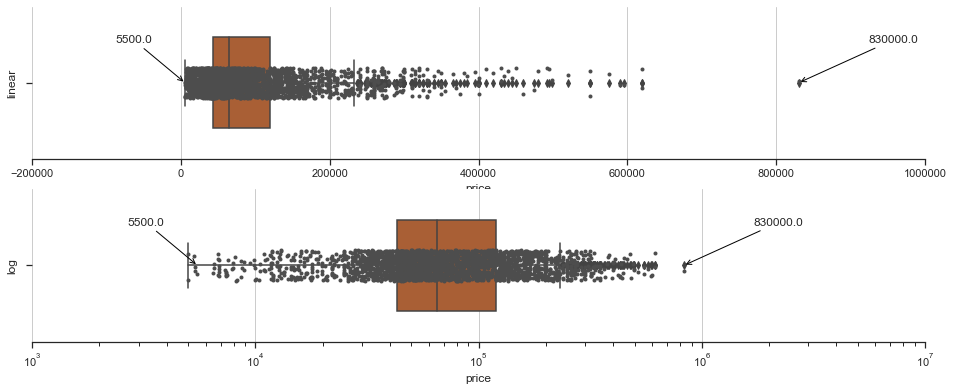

In [203]:
df_sale = df.query("op_type == 'For sale'")
boxplots_lin_log(df_sale, 'price', nsm=6, nlar=1, color=s)

Let's also take a look at the apartment areas since we will be transitioning in the further analysis from the price of the entire apartment to the per square meter rate. Setting a lower threshold of 10 square meters seems reasonable to exclude suspiciously small or otherwise atypical properties from our analysis:

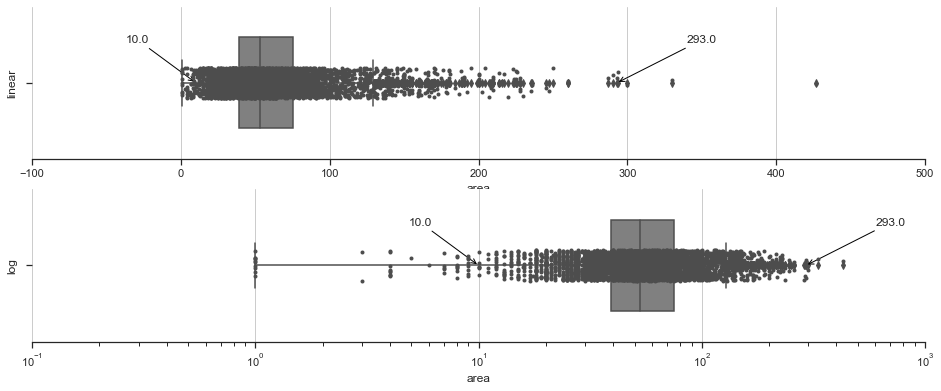

In [215]:
boxplots_lin_log(df, 'area', nsm=50, nlar=5)

If we are going to utilize geo coordinates, it would be advisable to filter them as well, as some of the entries appear to have errors. Compare:

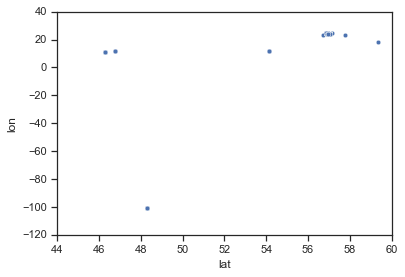

In [156]:
sns.scatterplot(data=df, x='lat', y='lon');

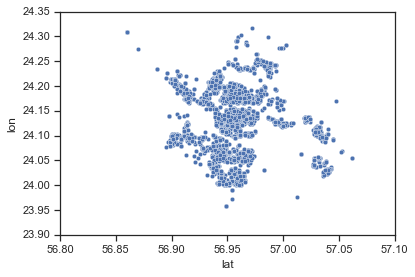

In [157]:
sns.scatterplot(data=df.query("~(lat > 57.1 or lat < 56 or lon < 23.8)"), x='lat', y='lon');

## Filtering, transformations, calculations

### Filter observations

Since we will primarily focus on the distributions and dependencies of sale and rent prices, let's exclude all operation types except for `For sale` and `For rent`. Additionally, we should exclude entries with `Citi` or empty values for the number of rooms. Let's combine these criteria with the earlier exclusion criteria we discussed and make sure to avoid null values in key fields.

In [158]:
filter_query = \
    "(op_type == 'For rent' and price > 85 or op_type == 'For sale' and price > 6000) " \
    "and area > 10 " \
    "and rooms != 'Citi' and rooms == rooms " \
    "and district == district " \
    "and ~(lat > 57.1 or lat < 56 or lon < 23.8)"
# by using `rooms == rooms`-like comparisons we get non-NaNs only values

In [159]:
df = df.query(filter_query)

In [160]:
df = df.dropna(subset=['floor', 'rooms', 'area', 'lat', 'lon', 'price']).copy()  # fix the result with .copy

### Type conversion

Now, let's convert the `rooms` column to integers, as well as some other columns that are currently stored as `float64`. While this conversion might save memory for larger datasets, here it's mainly for fun and consistency.

In [161]:
df['rooms'] = df['rooms'].astype(int)

In [162]:
for col in df.select_dtypes(include='float64'):
    if (df[col] % 1 == 0).all():
        df[col] = df[col].astype(int)
        print(f"Converted to int: {col}")
df.info()

Converted to int: floor
Converted to int: total_floors
Converted to int: price
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 0 to 4688
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_type       3790 non-null   object 
 1   district      3790 non-null   object 
 2   street        3790 non-null   object 
 3   rooms         3790 non-null   int32  
 4   area          3790 non-null   float64
 5   floor         3790 non-null   int32  
 6   total_floors  3790 non-null   int32  
 7   house_seria   3790 non-null   object 
 8   house_type    3790 non-null   object 
 9   condition     3790 non-null   object 
 10  price         3790 non-null   int32  
 11  lat           3790 non-null   float64
 12  lon           3790 non-null   float64
dtypes: float64(3), int32(4), object(6)
memory usage: 355.3+ KB


### Extract streets from an address

Again, while we are not going utilize streets in our analysis to great extent, let's split address (comprising of street and house number) and extract street names. We should pay attention, that house numbers might not be exclusively digits. As well we might meet digits both at the beginning and at the end of street names. So, write a couple of functions for that:

In [163]:
import re
# we utilize here the nice property of Latvian, that ordered number is denoted with dot (.) at the end
ordered_number_pattern = re.compile(r'^\d+\.$')  

def is_part_of_a_street(x):
    if len(x) == 1:
        return False
    if re.match(ordered_number_pattern, x):
        return True
    if all(not(c.isdigit()) for c in str(x)):
        return True
    return False
def join_street(row):
    return ' '.join(x for x in row[[0, 1, 2, 3]] if x is not None and is_part_of_a_street(x.strip()))

# TODO: further tune street attribution, say `Brīvības` > (bulvāris, gatve, iela)?

In [164]:
df_addr_split = df['street'].str.rsplit(' ', expand=True)
df_addr_split['street'] = df_addr_split.apply(join_street, axis=1)
df['street'] = df_addr_split['street']
df['street'].value_counts(dropna=False).sort_index(ascending=True)

13. janvāra     9
Aglonas         7
Ainavas         3
Aizkraukles     2
Akas            2
               ..
Ūbeles          1
Ūdens           3
Ūdeļu           1
Ūnijas         24
Žagatu          8
Name: street, Length: 577, dtype: int64

### Price per square meter

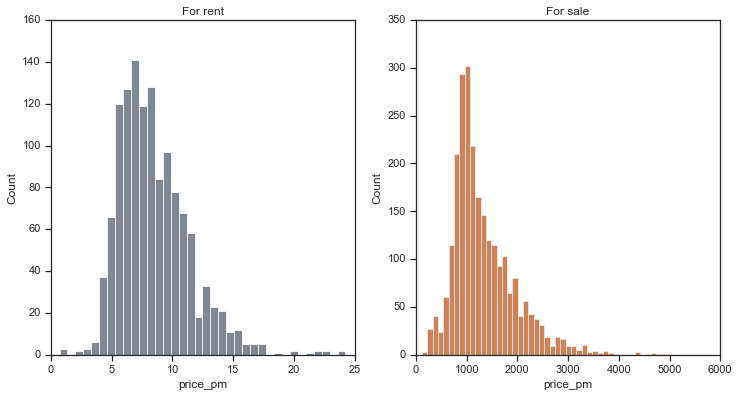

In [165]:
df['price_pm'] = df['price'] / df['area']
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False)
sns.histplot(data=df[df.op_type == 'For rent'], x='price_pm', ax=axes[0], color=r);
sns.histplot(data=df[df.op_type == 'For sale'], x='price_pm', ax=axes[1], color=s);
axes[0].set(title='For rent');
axes[1].set(title='For sale');

OK, okay, everyone loves that smooth stuff on top of the bars... Much better now!

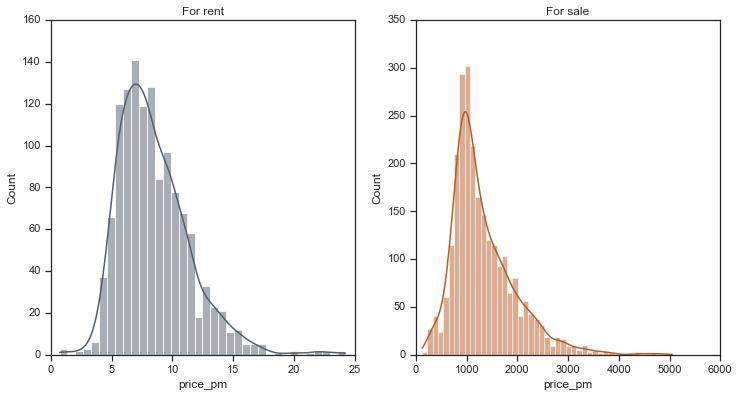

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False)
sns.histplot(data=df[df.op_type == 'For rent'], x='price_pm', kde=True, ax=axes[0], color=r);
sns.histplot(data=df[df.op_type == 'For sale'], x='price_pm', kde=True, ax=axes[1], color=s);
axes[0].set(title='For rent');
axes[1].set(title='For sale');

## Calculate line distance to the Center
As we have lattitude and longitude variables for every observation, it would be a shame not to calculate distance to some point, right? While more advanced formulas or libraries exist for calculating distances on the Earth's surface, for city-scale analysis, simple Pythagorean calculations will suffice. The resulting distance will be abstract but can still be used as a predictor in some models.

Now, we just need to choose the center of the city. And that would undoubtedly be...

![640px-Freedom_Monument_Panorama.jpg](img/640px-Freedom_Monument_Panorama.jpg)

Plaza of the Freedom Monument. Source: Wikipedia. https://en.wikipedia.org/wiki/Freedom_Monument, author: Xil, license: CC BY-SA 3.0
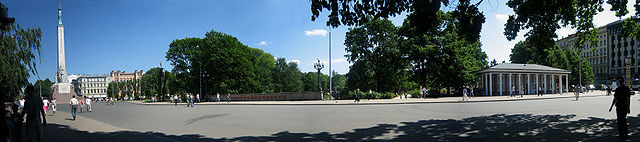

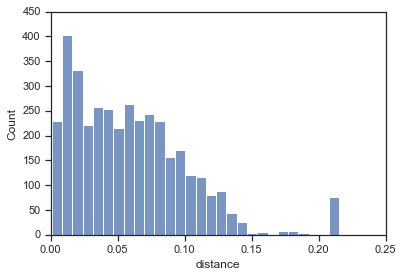

In [167]:
mlat, mlon = 56.95157448961589, 24.113221585913674
df['distance'] = np.sqrt((df['lat'] - mlat)**2 + (df['lon'] - mlon)**2)
sns.histplot(df, x='distance');

## Some simple facts

Forget about complex transformations for a moment. Let's satisfy our curiosity with some simple slicing and summarizing. We can use the `loc` method to determine the number of objects located in the Center.

In [168]:
df.loc[df.district == 'centrs', 'district'].value_counts()

centrs    1231
Name: district, dtype: int64

What are the top streets with the highest number of offers, grouped by the type of deal?

In [169]:
deal_street_counts = df.groupby(['op_type', 'street']).size().reset_index(name='count')
deal_street_counts.groupby('op_type').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

,op_type,street,count
0,For rent,Maskavas,35
1,For rent,Lāčplēša,31
2,For rent,Čaka,30
3,For rent,Ozolciema,27
4,For rent,Bruņinieku,26
5,For sale,Maskavas,78
6,For sale,Valdemāra,54
7,For sale,Ģertrūdes,37
8,For sale,Stirnu,33
9,For sale,Dzelzavas,29


### Merge with times-to-center

We deliberately evaluate a place in the city based on its distance from the city center. Typically, many businesses and attractions are located there, and Riga is no exception. Moreover, we are interested not only in the "flight" distance we calculated earlier, based on latitude and longitude, but also in transportation proximity.

Using Google Maps, we obtained the travel times to reach the city center by car and by public transport from all other districts. These travel times, in minutes, were measured during the middle of an ordinary weekday. For these calculations, we considered the center of a central district, as presented in Google Maps, which is somewhere around the intersection of Krišjāņa Valdemāra iela and Dzirnavu iela.

Let's join this data to the original dataset.

In [170]:
minutes_to_center_car_public = {
    'centrs': (0, 0),
    'Purvciems': (17, 32),
    'Āgenskalns': (18, 19),
    'Imanta': (27, 32),
    'Ziepniekkalns': (21, 37),
    'Ķengarags': (24, 42),
    'Pļavnieki': (24, 36),
    'Teika': (20, 24),
    'Mežciems': (23, 42),
    'Vecrīga': (9, 14),
    'Iļģuciems': (26, 31),
    'Vecmīlgrāvis': (26, 48),
    'Zolitūde': (27, 33),
    'Jugla': (21, 41),
    'Sarkandaugava': (16, 28),
    'Šampēteris-Pleskodāle': (22, 34),
    'Maskavas priekšpilsēta': (12, 25),
    'Mežaparks': (24, 45), 
    'Bolderāja': (36, 80), 
    'Dzegužkalns': (22, 22), 
    'Dārzciems': (23, 27), 
    'Čiekurkalns': (18, 35), 
    'Krasta r-ns': (15, 35), 
    'Grīziņkalns': (10, 19), 
    'Torņakalns': (16, 32), 
    'Klīversala': (14, 26), 
    'Daugavgrīva': (35, 60), 
    'Ķīpsala': (16, 26), 
    'Mangaļi': (20, 33), 
    'Šķirotava': (26, 42), 
    'Aplokciems': (23, 47), 
    'Zasulauks': (22, 23), 
    'Jaunciems': (33, 51), 
    'Berģi': (31, 57),
    'Bieriņi': (24, 37),
    'Mangaļsala': (32, 72),
    'Voleri': (30, 60),
    'Katlakalns': (19, 56),
    'Brekši': (30, 55),
    'Dreiliņi': (25, 45),
    'Bukulti': (26, 60),
    'Kleisti': (35, 70),
    'Jaunmīlgrāvis': (22, 33),
    'VEF': (11, 19),
    'Kundziņsala': (18, 27),
    'Vecdaugava': (29, 69),
    'Vecāķi': (31, 70),
    'Buļļi': (37, 66),
}

In [171]:
df_ttcenter = pd.DataFrame(minutes_to_center_car_public).T
df_ttcenter.columns = ('car', 'public')
df = pd.merge(df, df_ttcenter, how='left', left_on='district', right_index=True)
df.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon,price_pm,distance,car,public
0,For rent,Purvciems,Dzelzavas,1,27.0,3,5,LT proj.,Brick-Panel,All amenities,250,56.955484,24.202139,9.259259,0.089004,17,32
1,For rent,Ziepniekkalns,Ozolciema,2,50.0,7,9,602.,Panel,All amenities,300,56.899798,24.098350,6.000000,0.053870,21,37
2,For sale,centrs,Ieroču,2,33.0,1,2,P. kara,Wood,Partial amenities,13500,56.975092,24.139884,409.090909,0.035552,0,0
3,For sale,Ķengarags,Maskavas,2,50.0,5,5,LT proj.,Panel,All amenities,34000,56.859788,24.308342,680.000000,0.215631,24,42
4,For rent,Teika,Zemgala gatve,3,76.0,3,12,Jaun.,Masonry,All amenities,490,56.977745,24.166042,6.447368,0.058949,20,24


## Price and proximity

But before we delve into the analysis, let's first examine the relationship between accessibility by car and by public transport across the districts of Riga.

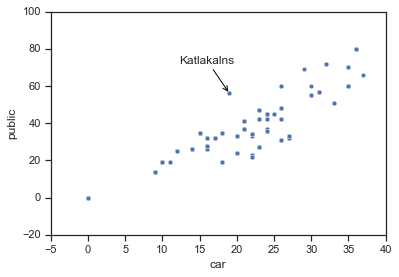

In [172]:
plt.annotate('Katlakalns', xy=(19, 56), xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(color='black', arrowstyle='->'))
sns.scatterplot(df, x='car', y='public');

Surprisingly, there is a fairly linear relationship between accessibility by car and by public transport across the districts, with Katlakalns being a mild exception. Let's keep it that way, at least to demonstrate how we work with annotations. Additionally, it seems that there are two clusters in terms of accessibility: the districts in the upper left corner are noticeably less connected to the center.

Now, I am going to create simple bar plots with point and interval estimations to visualize the mean price in different proximity groups of advertisements.

In [173]:
bins = [-1, 0, 20, 25, 50]
labels = ['0', '0-20', '20-25', '25+']
df['car_bin'] = pd.cut(df['car'], bins, labels=labels)
df['car_bin'].value_counts()

0        1231
0-20     1062
20-25     951
25+       546
Name: car_bin, dtype: int64

We should also check that distance bins are not exclusively represented by a single district (except for the bin representing distance 0, which is expected):

In [174]:
pd.crosstab(df.district, df.car_bin)

car_bin,0,0-20,20-25,25+
district,,,,
Aplokciems,0,0,12,0
Berģi,0,0,0,6
Bieriņi,0,0,7,0
Bolderāja,0,0,0,40
Brekši,0,0,0,3
Bukulti,0,0,0,2
Buļļi,0,0,0,1
Daugavgrīva,0,0,0,26
Dreiliņi,0,0,2,0


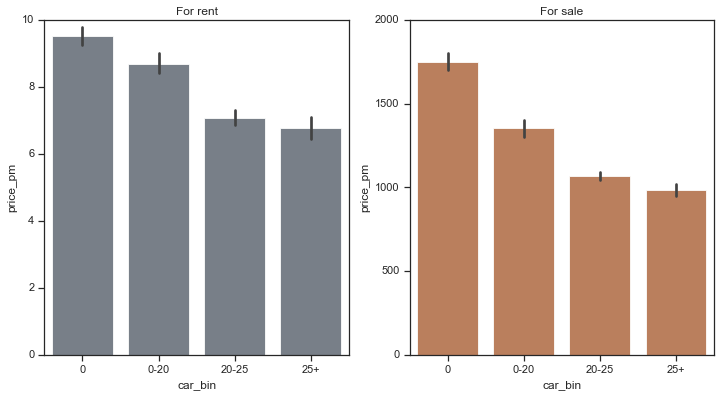

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False)
sns.barplot(data=df[df.op_type == 'For rent'], ax=axes[0], x='car_bin', y='price_pm', estimator='mean', errorbar=('ci', 95), color=r, alpha=0.8);
sns.barplot(data=df[df.op_type == 'For sale'], ax=axes[1], x='car_bin', y='price_pm', estimator='mean', errorbar=('ci', 95), color=s, alpha=0.8);
axes[0].set(title='For rent');
axes[1].set(title='For sale');

In [176]:
bins = [-1, 0, 25, 35, 150]
labels = ['0', '0-25', '25-35', '35+']
df['public_bin'] = pd.cut(df['public'], bins, labels=labels)
df['public_bin'].value_counts()

0        1231
35+       985
25-35     984
0-25      590
Name: public_bin, dtype: int64

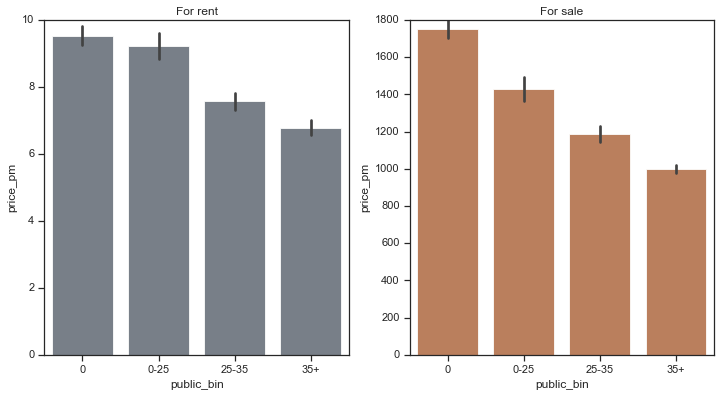

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False)
sns.barplot(data=df[df.op_type == 'For rent'], ax=axes[0], x='public_bin', y='price_pm', estimator='mean', errorbar=('ci', 95), color=r, alpha=0.8);
sns.barplot(data=df[df.op_type == 'For sale'], ax=axes[1], x='public_bin', y='price_pm', estimator='mean', errorbar=('ci', 95), color=s, alpha=0.8);
axes[0].set(title='For rent');
axes[1].set(title='For sale');

### Build a model?
The culmination of such demonstration notebooks usually involves building some sort of predictive model. In line with that, we will proceed to build a not very complex regression model.

However, before that, we need to prepare some additional predictors for this purpose.

Masonry        1197
Panel          1087
Brick           768
Brick-Panel     386
Panel-Brick     182
Wood            170
Name: house_type, dtype: int64

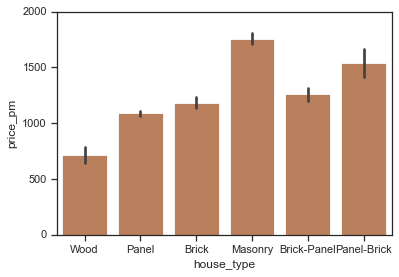

In [178]:
sns.barplot(data=df[df.op_type == 'For sale'], x='house_type', y='price_pm', estimator='mean', errorbar=('ci', 95), color=s, alpha=0.8);
df.house_type.value_counts()

Group Masonry with Panel-Brick, keep Wood a separate category, and combine others to Conventional.

In [179]:
group_dict = {'Wood': 'Wood', 'Masonry': 'Masonry-Panel-Brick', 'Panel-Brick': 'Masonry-Panel-Brick'}
df['house_type_grp'] = df['house_type'].replace(group_dict)
df.loc[~df['house_type'].isin(group_dict.keys()), 'house_type_grp'] = 'Conventional'
df.house_type_grp.value_counts()

Conventional           2241
Masonry-Panel-Brick    1379
Wood                    170
Name: house_type_grp, dtype: int64

2    1322
3    1105
1     927
4     325
5      88
6      23
Name: rooms, dtype: int64

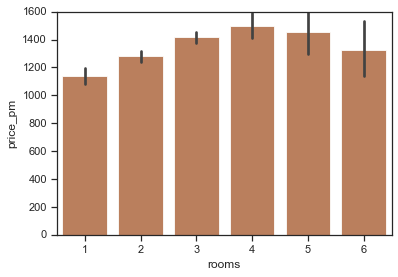

In [180]:
sns.barplot(data=df[df.op_type == 'For sale'], x='rooms', y='price_pm', estimator='mean', errorbar=('ci', 95), color=s, alpha=0.8);
df.rooms.value_counts()

While we observe a tendency of lower price per square meter in 5 and 6-room apartments, the estimations in these categories may not be very reliable due to the smaller sample size, as indicated by the wider confidence intervals. To address this issue, I suggest grouping 5 and 6-room apartments into a single category of 4-room apartments and using the room number as a continuous linear predictor. This would provide more stable estimates and improve the predictive model.

In [181]:
df.loc[df.rooms > 4, 'rooms'] = 4
df.rooms.value_counts()

2    1322
3    1105
1     927
4     436
Name: rooms, dtype: int64

Now, to the model fit. We'll use `sklearn` for a nice train-test-split feature. But for model fitting itself I'd take `OLS` from `statsmodels`, as it produces nicely formatted summary I used to. 

In [182]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [183]:
# Our predictors: 'public', 'distance', 'condition', 'house_type_grp', 'rooms'
# Our dependent var: price_pm

X = df.loc[df.op_type == 'For sale', ['public', 'distance', 'condition', 'house_type_grp', 'rooms']]
X['intercept'] = 1
X = pd.get_dummies(data=X, drop_first=True)  # auto-conversion string variables to 0-1-coded dummy, omitting one category
y = df.loc[df.op_type == 'For sale', ['price_pm']]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2008, 8)
(2008, 1)
(502, 8)
(502, 1)


In [185]:
model = sm.OLS(y_train, X_train).fit()

In [186]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               price_pm   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     191.8
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          8.52e-218
Time:                        18:35:51   Log-Likelihood:                -15293.
No. Observations:                2008   AIC:                         3.060e+04
Df Residuals:                    2000   BIC:                         3.065e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
publ

Almost there. Just calculate MSE and R-squared for predictions on a test set:

In [187]:
y_pred = model.predict(X_test)

In [188]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 227066.31359945395
R-squared: 0.42957569195638345


## Conclusion
We have performed various data manipulation tasks using pandas in this notebook:
* Reading dataframes from files and creating custom datasets
* Filtering and selecting data
* Aggregating and calculating new columns
* Regrouping values into new columns and converting data types
* Merging different dataframes by keys

Furthermore, we have presented data analysis and statistics using:
* Numerical summaries and frequency distributions
* Crosstabulations for analyzing relationships
* Interval estimations for means using charts
* Charts for visualizing one-way and two-way distributions
* Lnear regression for predictive modeling

Certainly, we haven't utilized the full potential of the dataset for geo-visualization or advanced predictive modeling. However, I hope this work serves as another testament to the value of learning pandas and Jupyter notebooks. They are powerful tools for data analysis and exploration.